In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
%matplotlib inline

#### 3) Calcula la función de correlación para cada una de las cajas de datos del inciso anterior, usando los estimadores de

    a) Peebles-Hauser

    b) Davis-Peebles

    c) Hamilton

    d) Landy-Szalay

y recuerda escoger un bin adecuado para ver las señales. Utiliza 10 veces el número de puntos en las muestras aleatorias que con los datos.

In [3]:
def dis(x,y,z):
    return pow(pow(x,2)+pow(y,2)+pow(z,2),0.5) #teorema de pitagoras

In [2]:
def dis_NN(m):
    dis_2d = []
    N = len(m[:,0])
    for i in range(N):
        for j in range(N):
            if i != j: # No consideramos distancias entre un mismo punto.
                if i > j: #No consideramos las mismas distancias repetidas entre puntos repetidos.
                    dis_2d.append(dis( m[:,0][i]-m[:,0][j], m[:,1][i]-m[:,1][j], 0 ))
    return dis_2d

In [153]:
def dis_MN(m,n):
    dis_2d = []
    M = len(m[:,0])
    N = len(n[:,0])
    for i in range(M):
        for j in range(N):
            dis_2d.append(dis( m[:,0][i]-n[:,0][j], m[:,1][i]-n[:,1][j], 0 ))
    return dis_2d

In [4]:
def Histo_dist (Dist,bins_0):
    frec, b = np.histogram(Dist, bins = bins_0)
    plt.figure()
    histo_2d = np.array(Dist) 
    plt.figure()
    plt.hist(histo_2d, bins=bins_0)
    plt.title("Histograma de distancias",fontsize=18)
    plt.ylabel("Frecuencia",fontsize=18) 
    plt.xlabel("Distancia",fontsize=18)
    plt.show()
    return frec, b

#### Peebles-Hauser

In [175]:
def Pee_Hau(DD,RR,Nd,Nr):
    n = pow((Nr*(Nr-1))/(Nd*(Nd-1)),0.5)
    return ((np.divide(DD,RR))/pow(n,2)) 

#### Davis-Peebles

In [176]:
def Dav_Pee(DD,DR,Nd,Nr):
    n = pow((Nr*(Nr-1))/(Nd*(Nd-1)),0.5)
    return ((np.divide(DD,DR))/(n))

#### Hamilton

In [188]:
def Hamilton(DD,RR,DR):
    return np.divide(DD*RR,np.power(DR,2))

#### Landy-Szalay

In [191]:
def Lan_Sza(DD,RR,DR,Nd,Nr):
    n = pow((Nr*(Nr-1))/(Nd*(Nd-1)),0.5)
    return 1 + ((np.divide(DD,RR))/pow(n,2)) - 2*((np.divide(DR,RR))/n)

Definimos las funciones para hacer los datos

#### MALLA

In [7]:
def malla_cuad (tamaño,ret): 
    DD = [] 
    DD = open('Tabla_Datos_malla.dat',"w")  #abrimos un scrip para manejar los datos.
    c, d = 0, 0
    for i in range(int(tamaño/ret)): 
        for j in range(int(tamaño/ret)):
            c, d  = i*ret, j*ret #acomoda los puntos en y
            DD.write("%f  \t%f \n" % (c,d))
    DD.close()
    return np.loadtxt('Tabla_Datos_malla.dat') 

#### DISCO

In [8]:
def disco_random (rad,puntos):
    D = []
    D = open('Tabla_Datos_disco.dat',"w")  #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        r = pow(random.randrange(0,rad**2,1),0.5) #Radio aleatorio tomando en cuenta el jacobiano.
        th = random.random()*2*math.pi #valor de theta aleatorio, 
        x = r*math.cos(th) # usando la ecuación parametrica del círculo 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y)) 
    D.close()
    return np.loadtxt('Tabla_Datos_disco.dat')

#### ANILLO

In [9]:
def anillo_random(rad_ex,rad_in,puntos):
    D = []
    D = open('Tabla_Datos_Aro.dat',"w")  #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        r = pow(random.randrange(rad_in**2,rad_ex**2,1),0.5) #puntos aleatorios en un radio interior y uno exterior
        th = random.random()*2*math.pi
        x = r*math.cos(th) 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y))
    D.close()
    return np.loadtxt('Tabla_Datos_Aro.dat') # u = RR_1[:,0] y v = RR_1[:,1]

#### ANILLOS DISPERSOS

In [10]:
def anillos_randoms_2(num_anillos, rad_in,rad_ext, puntos, tam_caja):
     
    D_5 = open('Tabla_Datos_anillos_aleatorios2.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(num_anillos):
        r_x0 = random.randrange(0,tam_caja,1) # coordenada x donde se ubicará el anillo
        r_y0 = random.randrange(0,tam_caja,1) # coordenada y donde se ubicará el anillo
        
        for j in range(puntos):
            r = pow(random.randrange(rad_in**2,rad_ext**2,1),0.5)
            th = random.random()*2*math.pi
            x = r*math.cos(th) + r_x0
            y = r*math.sin(th) + r_y0
            if 0<x<tam_caja and 0<y<tam_caja:
                D_5.write("%f  \t%f \n" % (x,y))
    D_5.close()
    
    return np.loadtxt('Tabla_Datos_anillos_aleatorios2.dat')

Creamos los datos:

In [16]:
malla = malla_cuad(1000,25) #hacemos una malla de tamaño 1000x1000 (10x10 cada reticula)
disco = disco_random(300,1000) #Hacemos un disco de radio 300 con 1000 pntos
anillo = anillo_random(300,290,1000) # Anillo de radio interno 290 y radio externo 300 con 1000 puntos
anillos_r = anillos_randoms_2(50,290,300,100,1000)

Calcualamos distancias entre los datos:

In [17]:
dis_malla = dis_NN(malla)

In [18]:
dis_disco = dis_NN(disco)

In [19]:
dis_anillo = dis_NN(anillo)

In [20]:
dis_anillos_r = dis_NN(anillos_r)

Creamos los Datos aleatorios R

In [21]:
def caja_Rand(dim,puntos): 
    R = open('Tabla_Aleatorios.dat',"w") #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        a, b = 0, 0 #iniciamos las variables
        a = random.random()*dim #random.random sólo da valores entre 0 y 1 por lo que lo multiplico por la dimención de la caja
        b = random.random()*dim
        R.write("%f  \t%f \n" % (a,b)) #escribimos los valores en el scip.
    R.close()
    return np.loadtxt('Tabla_Aleatorios.dat') # x = RR[:,0] | y = RR[:,1]

In [60]:
dimencion = 1000
puntos = len(malla)*2
R_malla = caja_Rand(dimencion,puntos) #hacemos la caja

In [61]:
dimencion = 1000
puntos = len(disco)*2
R_disco = caja_Rand(dimencion,puntos) #hacemos la caja

In [69]:
dimencion = 1000
puntos = len(anillo)*2
R_anillo = caja_Rand(dimencion,puntos) #hacemos la caja

In [73]:
dimencion = 1000
puntos = len(anillos_r)*2
R_anillos_r = caja_Rand(dimencion,puntos) #hacemos la caja

Obtenemos las distancias entre los datos aleatorios:

In [66]:
dis_R_malla = dis_NN(R_malla) #arreglo de distancias

In [67]:
dis_R_disco = dis_NN(R_disco) 

In [71]:
dis_R_anillo = dis_NN(R_anillo) 

In [74]:
dis_R_anillos_r = dis_NN(R_anillos_r)

Distancias DR:

In [158]:
dis_DR_malla = dis_MN(malla,R_malla)

In [159]:
dis_DR_disco = dis_MN(disco,R_disco)

In [160]:
dis_DR_anillo= dis_MN(anillo,R_anillo)

In [161]:
dis_DR_anillos_r = dis_MN(anillos_r,R_anillos_r)

#### a) Peebles-Hauser

<Figure size 432x288 with 0 Axes>

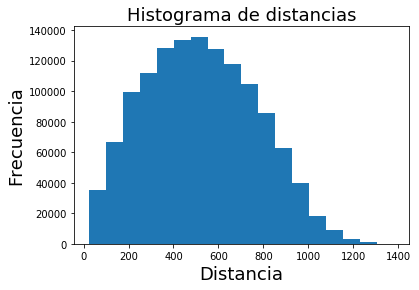

In [75]:
binn = 18
DD_malla, bins_D_malla = Histo_dist(dis_malla,binn)

<Figure size 432x288 with 0 Axes>

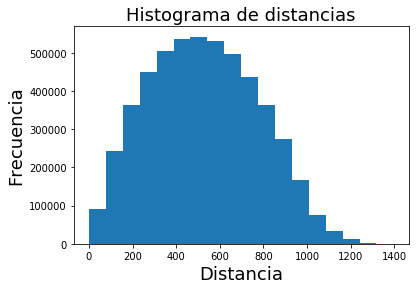

In [76]:
RR_malla, bins_R_malla = Histo_dist(dis_R_malla,binn)

<Figure size 432x288 with 0 Axes>

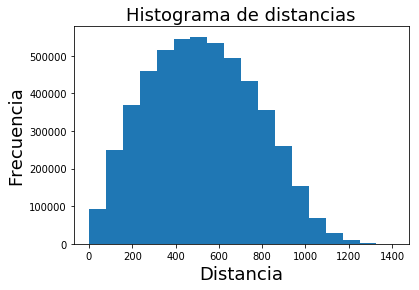

In [162]:
DR_malla, bins_DR_malla = Histo_dist(dis_DR_malla,binn)

In [214]:
PH_malla = Pee_Hau(DD_malla,RR_malla,len(malla),len(R_malla))
DP_malla = Dav_Pee(DD_malla,DR_malla,len(malla),len(R_malla))
HM_malla = Hamilton(DD_malla,RR_malla,DR_malla)
LS_malla = Lan_Sza(DD_malla,RR_malla,DR_malla,len(malla),len(R_malla))

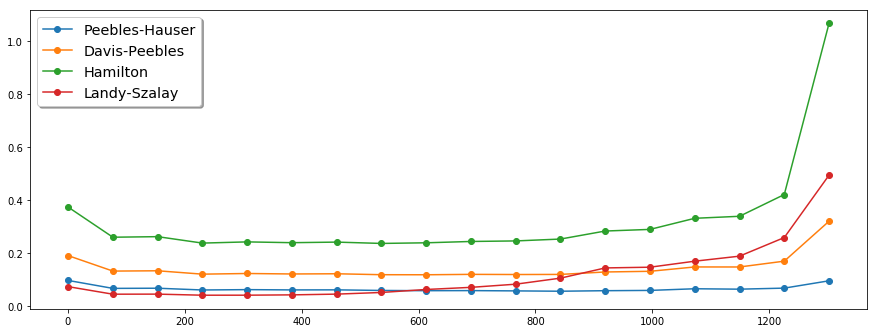

In [202]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_1[:-1],PH_malla,'o-',label='Peebles-Hauser')
plt.plot(bins_R_1[:-1],DP_malla,'o-',label='Davis-Peebles')
plt.plot(bins_R_1[:-1],HM_malla,'o-',label='Hamilton')
plt.plot(bins_R_1[:-1],LS_malla,'o-',label='Landy-Szalay')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')


#### b) Davis-Peebles

<Figure size 432x288 with 0 Axes>

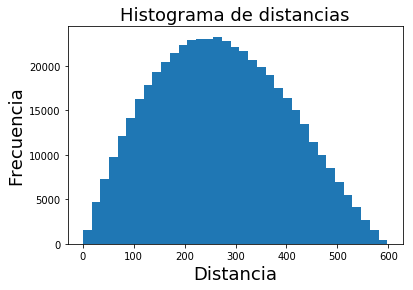

In [211]:
binn = 35
DD_disco, bins_D_disco = Histo_dist(dis_disco,binn)

<Figure size 432x288 with 0 Axes>

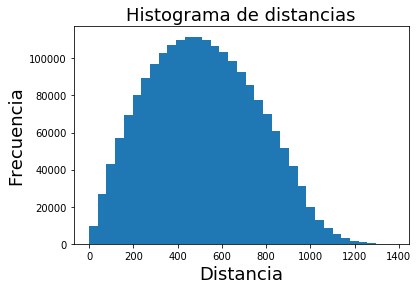

In [212]:
RR_disco, bins_R_disco = Histo_dist(dis_R_disco,binn)

<Figure size 432x288 with 0 Axes>

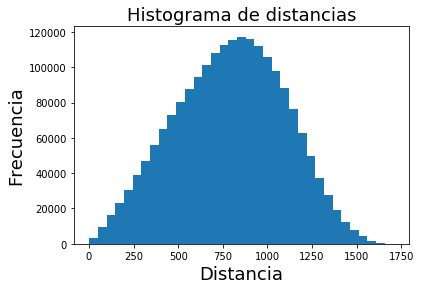

In [219]:
DR_disco, bins_DR_disco = Histo_dist(dis_DR_disco,binn)

In [224]:
PH_disco = Pee_Hau(DD_disco,RR_disco,len(disco),len(R_disco))
DP_disco = Dav_Pee(DD_disco,DR_disco,len(disco),len(R_disco))
HM_disco = Hamilton(DD_disco,RR_disco,DR_dico)
LS_disco = Lan_Sza(DD_disco,RR_disco,DR_disco,len(disco),len(R_disco))

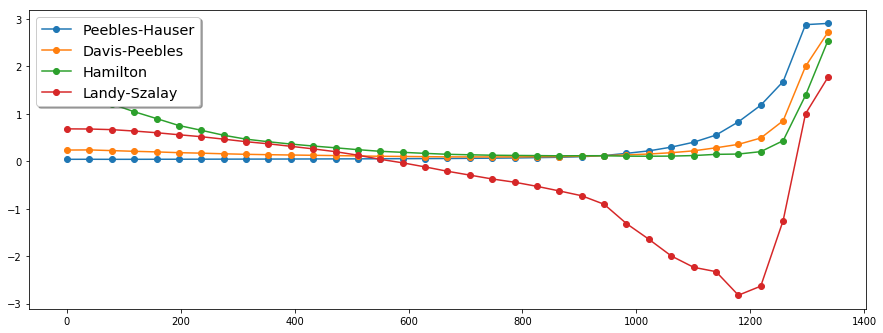

In [225]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_disco[:-1],PH_disco,'o-',label='Peebles-Hauser')
plt.plot(bins_R_disco[:-1],DP_disco,'o-',label='Davis-Peebles')
plt.plot(bins_R_disco[:-1],HM_disco,'o-',label='Hamilton')
plt.plot(bins_R_disco[:-1],LS_disco,'o-',label='Landy-Szalay')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')


#### c) Hamilton

<Figure size 432x288 with 0 Axes>

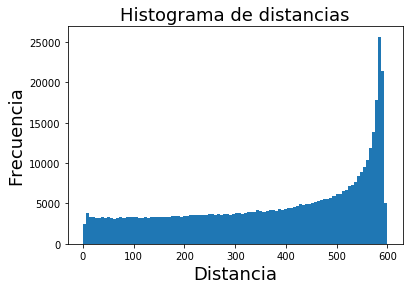

In [229]:
binn = 100
DD_anillo, bins_D_anillo = Histo_dist(dis_anillo,binn)